<a href="https://colab.research.google.com/github/sairahulkhanapuram/SML-ASS/blob/main/SML_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/breast_cancer_survival.csv')
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [2]:
d['Gender'] = d['Gender'].map({'FEMALE': 0, 'MALE': 1})
d['Tumour_Stage'] = d['Tumour_Stage'].map({'I': 1, 'II': 2, 'III': 3})
d['Histology'] = d['Histology'].factorize()[0]
d['ER status'] = d['ER status'].map({'Positive': 1, 'Negative': 0})
d['PR status'] = d['PR status'].map({'Positive': 1, 'Negative': 0})
d['HER2 status'] = d['HER2 status'].map({'Positive': 1, 'Negative': 0})
d['Surgery_type'] = d['Surgery_type'].factorize()[0]
d['Patient_Status'] = d['Patient_Status'].map({'Alive': 1, 'Dead': 0})
d['Date_of_Surgery']=d['Date_of_Surgery'].map({'20-May-18':0,'26-Apr-18':1,'24-Aug-18':2,'16-Nov-18':3,'12-Dec-18':4,'15-Jan-19':5,'25-Jul-18':6,'26-Mar-19':7,'26-Nov-18':8,'04-Feb-19':9})
d['Date_of_Last_Visit']=d['Date_of_Last_Visit'].map({'26-Aug-18':0,'25-Jan-19':1,'08-Apr-20':2,'28-Jul-20':3,'05-Jan-19':4,'27-Mar-20':5,'23-Apr-19':6,'11-Oct-19':7,'05-Dec-18':8,'10-Aug-19':9})
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0            0          1          1        

In [3]:
y=d['Patient_Status']
print(y)

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
329    1.0
330    1.0
331    0.0
332    1.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [4]:
x=d.drop('Patient_Status',axis=1)
print(x)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0            0          1          1        

In [5]:
x.fillna(x.mean(),inplace=True)

In [6]:
x.isna().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [7]:
y.isna().sum()

13

In [8]:
y.fillna(y.mean(),inplace=True)

In [9]:
y=y.astype(int)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(max_iter=1000)

In [12]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7761194029850746


In [13]:
from sklearn.svm import SVC
model=SVC()

In [14]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7761194029850746


In [15]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7313432835820896


In [16]:
from sklearn.utils import resample


In [17]:
knn_accuracies=[]
lr=[]
sv=[]


In [18]:
model_logistic=LogisticRegression(max_iter=1000)
model_knn = KNeighborsClassifier()
model_svc = SVC()

In [19]:
x.shape

(334, 14)

In [20]:
y.shape

(334,)

In [21]:
for i in range(10):
  x_resample,y_resample=resample(x,y)
  x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample, test_size=0.2,random_state=42)
  model_logistic.fit(x_train,y_train)
  model_knn.fit(x_train,y_train)
  model_svc.fit(x_train,y_train)
  y_pred_lr=model_logistic.predict(x_test)
  y_pred_knn=model_knn.predict(x_test)
  y_pred_svc=model_svc.predict(x_test)
  accuracy_knn=accuracy_score(y_test,y_pred_knn)
  accuracy_lr=accuracy_score(y_test,y_pred_lr)
  accuracy_svc=accuracy_score(y_test,y_pred_svc)
  knn_accuracies.append(accuracy_knn)
  lr.append(accuracy_lr)
  sv.append(accuracy_svc)
  print("Logistic Regression Accuracy:",accuracy_lr)
  print("KNN Accuracy:",accuracy_knn)
  print("SVC Accuracy:",accuracy_svc)

Logistic Regression Accuracy: 0.7014925373134329
KNN Accuracy: 0.6716417910447762
SVC Accuracy: 0.7164179104477612
Logistic Regression Accuracy: 0.7611940298507462
KNN Accuracy: 0.7910447761194029
SVC Accuracy: 0.7761194029850746
Logistic Regression Accuracy: 0.835820895522388
KNN Accuracy: 0.7910447761194029
SVC Accuracy: 0.835820895522388
Logistic Regression Accuracy: 0.7611940298507462
KNN Accuracy: 0.5970149253731343
SVC Accuracy: 0.746268656716418
Logistic Regression Accuracy: 0.7313432835820896
KNN Accuracy: 0.7761194029850746
SVC Accuracy: 0.746268656716418
Logistic Regression Accuracy: 0.6865671641791045
KNN Accuracy: 0.7164179104477612
SVC Accuracy: 0.6865671641791045
Logistic Regression Accuracy: 0.7761194029850746
KNN Accuracy: 0.7761194029850746
SVC Accuracy: 0.7910447761194029
Logistic Regression Accuracy: 0.7313432835820896
KNN Accuracy: 0.582089552238806
SVC Accuracy: 0.7164179104477612
Logistic Regression Accuracy: 0.7761194029850746
KNN Accuracy: 0.746268656716418
SVC 

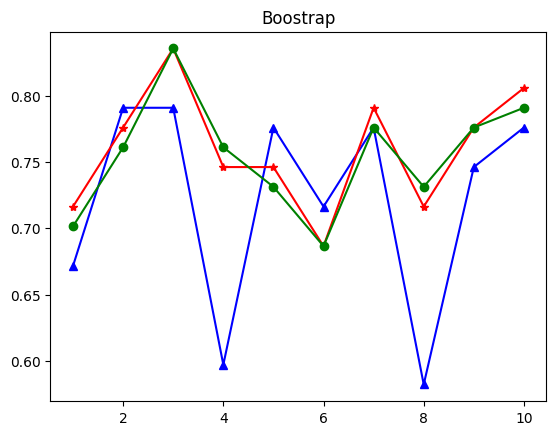

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
x = np.arange(1, len(knn_accuracies) + 1)
plt.title('Boostrap')
plt.plot(x, knn_accuracies, marker='^', label='knn', color='blue')
plt.plot(x, sv, marker='*', label='sv', color='red')
plt.plot(x, lr, marker='o', label='lr', color='green')
plt.show()